In [1]:
from brian2 import *
%matplotlib inline

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]


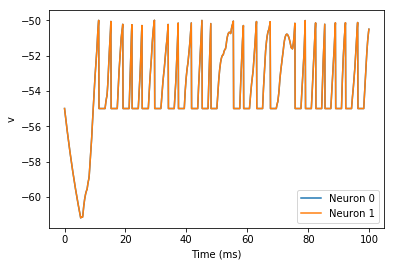

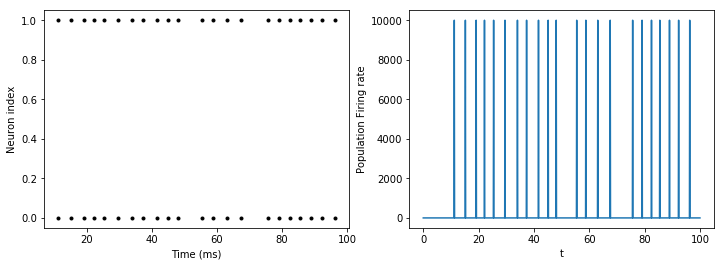

In [8]:
# Eventually do something like this
# def iaf_model(g_ampa, g_nmda, g_gaba)
start_scope()

c_m = 0.2 * nF
gl = 20 * nS
vl = -70 * mV

vt = -50*mV
vr = -55*mV
ve = 0*mV
vi = -70*mV

ta = 2 * ms
tn = 100 * ms
tg = 5 * ms

gn = 1.5 * nS
gg = 2.5 * nS
ga = 3.5 * nS

alpha = 0.5 / ms
duration = 1000 * ms

eqs = '''
dv/dt = (-gl * (v - vl) - isyn) / c_m : volt (unless refractory)
dx/dt = -x / ta : 1
dsn/dt = -sn / tn + alpha * x * (1 - sn) : 1
dsa/dt = -sa / ta : 1
dsg/dt = -sg / tg : 1
ia = ga * sa * (v - ve) : amp
ig = gg * sg * (v - vi) : amp
nmda = (1 + e ** (-0.062*v / (1 * volt)) / 3.57) : 1
inm = gn * sn * (v - ve) / nmda : amp
isyn = ia + inm + ig : amp
'''

G = NeuronGroup(2, eqs, threshold='v>vt', reset='v=vr', refractory=2*ms)
G.v = '-55 * mV'

background = PoissonGroup(1, 2400*Hz)
S_back = Synapses(background, G,
             on_pre='''sa_post += 1''')
S_back.connect()
S_back.delay = '5*ms'

# S = Synapses(G, G, on_pre='''
#              sa_post += 1
#              x_post += 1
#              sg_post += 1
#              ''')
# S.connect()
                
P = PoissonGroup(1, 2400*Hz)
M = StateMonitor(G, 'v', record=True)
N = SpikeMonitor(G)
O = PopulationRateMonitor(G)
run(100 * ms)

plot(M.t/ms, 1000*M.v[0], label='Neuron 0')
plot(M.t/ms, 1000*M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

figure(figsize=(12,4))
subplot(121)
plot(N.t/ms, N.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(O.t/ms, O.rate/Hz)
xlabel('t')
ylabel('Population Firing rate')